# Immigration characteristics

In [1]:
import pandas as pd, numpy as np

! whoami
! date

zmbc
Wed Oct 12 13:23:48 PDT 2022


In [2]:
acs = pd.read_hdf('../data/acs_2020_5yr_person.hdf', key='acs')
acs_hh = pd.read_hdf('../data/acs_2020_5yr_household.hdf', key='acs')

In [3]:
# PUMA is only unique in combination with state!
len(acs[['ST', 'PUMA']].drop_duplicates())

2351

In [4]:
acs['immigrant'] = (acs.MIG == 2).astype(int)
acs['gq_person'] = acs.RELSHIPP.isin([37, 38]).astype(int)
acs['ref_person'] = (acs.RELSHIPP == 20).astype(int)
acs['immigrant_ref_person'] = ((acs.ref_person == 1) & (acs.immigrant == 1)).astype(int)

In [5]:
acs['move_type_universe'] = np.where(acs.gq_person == 1, 'gq person', np.where(acs.SERIALNO.isin(acs[acs.immigrant_ref_person == 1].SERIALNO), 'household', 'non-reference person'))
acs['move_type'] = np.where(acs.immigrant == 1, acs.move_type_universe, 'none')

## Sample size considerations

The small sample sizes when stratified by PUMA motivated us to perturb the PUMA column.
Sampling from these small groups would lead to especially hard PRL, given that people who
are similar would tend to accumulate in the same area.

In [6]:
def histogram(series, xlabel, ylabel, bins='max'):
    if bins == 'max':
        bins = series.max()
    a = series.hist(bins=bins)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    return a

<AxesSubplot:xlabel='Number of recent immigrants', ylabel='Count of PUMAs'>

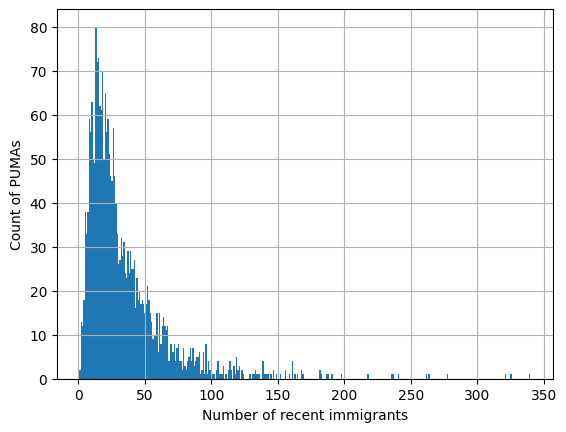

In [7]:
histogram(
    acs.groupby(['ST', 'PUMA']).immigrant.sum(),
    'Number of recent immigrants',
    'Count of PUMAs',
)

<AxesSubplot:xlabel='Rate of recent immigrants per 1,000 people', ylabel='Count of PUMAs'>

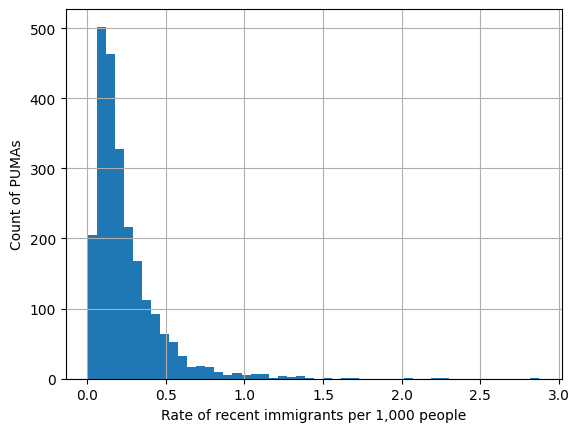

In [8]:
histogram(
    acs.groupby(['ST', 'PUMA']).agg({'immigrant': 'sum', 'PWGTP': 'sum'}).assign(proportion=lambda x: x.immigrant / x.PWGTP * 1_000).proportion,
    'Rate of recent immigrants per 1,000 people',
    'Count of PUMAs',
    bins=50
)

### Household moves

<AxesSubplot:xlabel='Number of recent immigrant reference people', ylabel='Count of PUMAs'>

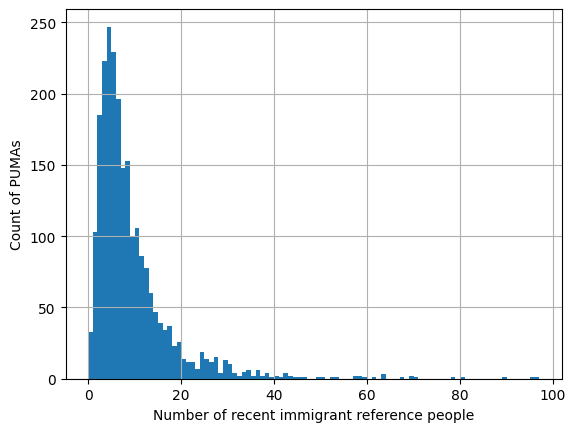

In [9]:
histogram(
    acs.groupby(['ST', 'PUMA']).immigrant_ref_person.sum(),
    'Number of recent immigrant reference people',
    'Count of PUMAs',
)

<AxesSubplot:xlabel='Rate of recent immigrant reference people per 1,000 people', ylabel='Count of PUMAs'>

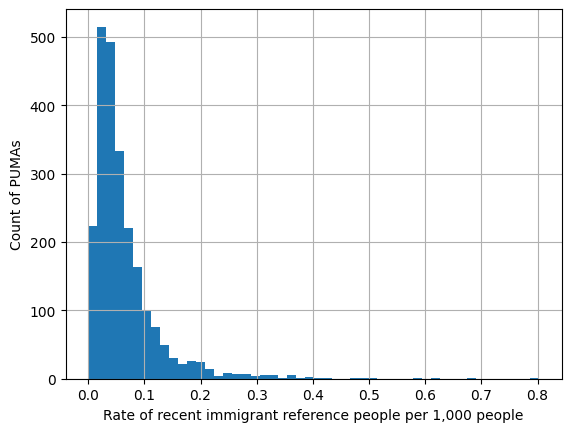

In [10]:
histogram(
    acs.groupby(['ST', 'PUMA']).agg({'immigrant_ref_person': 'sum', 'PWGTP': 'sum'}).assign(proportion=lambda x: x.immigrant_ref_person / x.PWGTP * 1_000).proportion,
    'Rate of recent immigrant reference people per 1,000 people',
    'Count of PUMAs',
    bins=50
)

### GQ person moves

<AxesSubplot:xlabel='Number of recent immigrant GQ movers', ylabel='Count of PUMAs'>

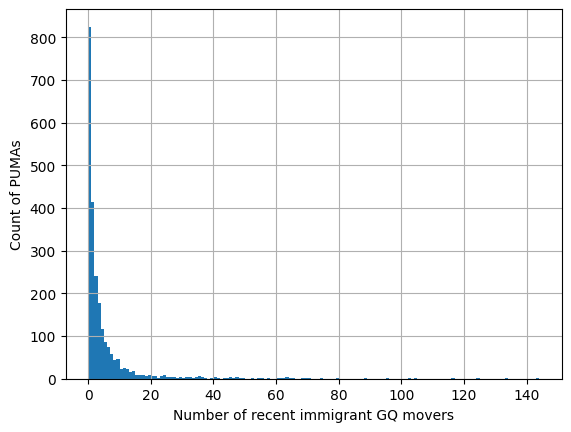

In [11]:
histogram(
    acs.assign(gq_mover=lambda x: (x.move_type == 'gq person').astype(int)).groupby(['ST', 'PUMA']).gq_mover.sum(),
    'Number of recent immigrant GQ movers',
    'Count of PUMAs',
)

<AxesSubplot:xlabel='Rate of recent immigrant GQ movers per 1,000 people', ylabel='Count of PUMAs'>

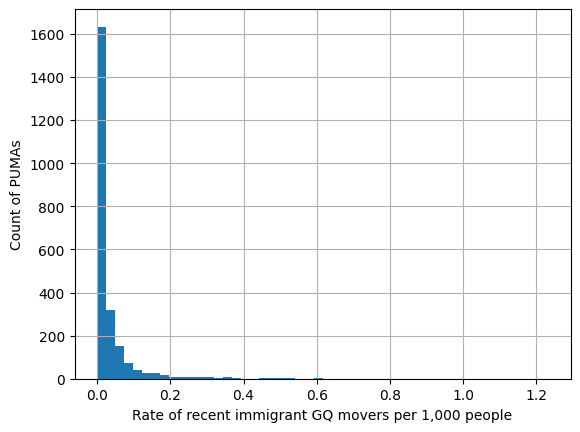

In [12]:
histogram(
    acs.assign(gq_mover=lambda x: (x.move_type == 'gq person').astype(int)).groupby(['ST', 'PUMA']).agg({'gq_mover': 'sum', 'PWGTP': 'sum'}).assign(proportion=lambda x: x.gq_mover / x.PWGTP * 1_000).proportion,
    'Rate of recent immigrant GQ movers per 1,000 people',
    'Count of PUMAs',
    bins=50
)

### Non-reference person moves

<AxesSubplot:xlabel='Number of recent immigrant non-reference-person movers', ylabel='Count of PUMAs'>

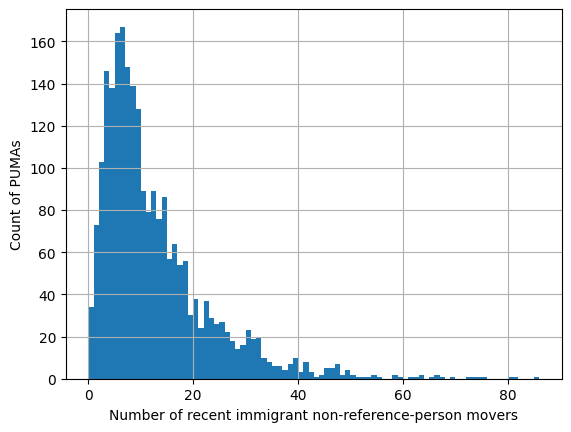

In [13]:
histogram(
    acs.assign(nrp_mover=lambda x: (x.move_type == 'non-reference person').astype(int)).groupby(['ST', 'PUMA']).nrp_mover.sum(),
    'Number of recent immigrant non-reference-person movers',
    'Count of PUMAs',
)

<AxesSubplot:xlabel='Rate of recent immigrant non-reference-person movers per 1,000 people', ylabel='Count of PUMAs'>

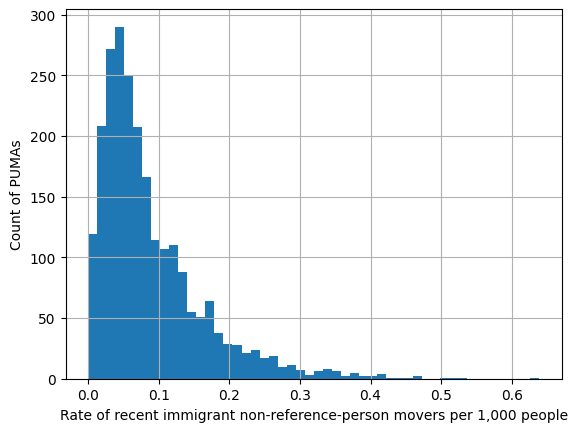

In [14]:
histogram(
    acs.assign(nrp_mover=lambda x: (x.move_type == 'non-reference person').astype(int)).groupby(['ST', 'PUMA']).agg({'nrp_mover': 'sum', 'PWGTP': 'sum'}).assign(proportion=lambda x: x.nrp_mover / x.PWGTP * 1_000).proportion,
    'Rate of recent immigrant non-reference-person movers per 1,000 people',
    'Count of PUMAs',
    bins=50
)